<a href="https://colab.research.google.com/github/yadukul/ML-Lab/blob/main/ml_lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Yadukul
##BL.EN.U4CSE21222
###Lab 6

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
data = pd.read_excel('/content/embeddingsdata.xlsx')
df = pd.DataFrame(data)

A1. Take any 2 features from your project having has real numeric values. Make a scatter plot of the data and observe the pattern.


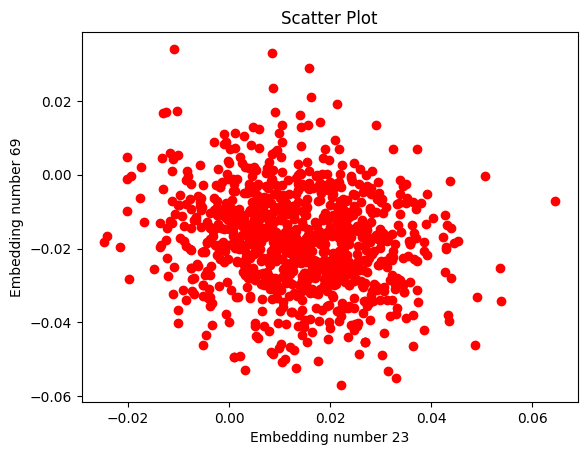

In [4]:
vector1 = data['embed_23'].to_numpy()
vector2 = data['embed_69'].to_numpy()
plt.scatter(vector1,vector2, color='red')
plt.title("Scatter Plot")
plt.xlabel("Embedding number 23")
plt.ylabel("Embedding number 69")
plt.show()

A2. Create a linear regression model on this data. Consider using one feature as independent variable while the other as dependent variable (you may also round this number to integer). After the model is created, calculate the mean square error by predicting the values from the model.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
X = data[['embed_23']]  # Independent variable
y = data['embed_69']  # Dependent variable
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.00018336563625638095


A3 Study all the parameters


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data' is your dataset

# Define the independent and dependent variables
X = data[['embed_23']]  # Independent variable
y = data['embed_69']  # Dependent variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Obtain the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Make predictions
y_pred = model.predict(X)

# Calculate the mean squared error and R-squared
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the results
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Coefficients: [-0.18425093]
Intercept: -0.01535736078222499
Mean Squared Error: 0.00018336563625638095
R-squared: 0.03275188286966324


A4. Using the training set available for your project, train a logistic regression classifier. Use this
classifier to evaluate your test set accuracy. Study the various parameters associated with logistic
regression model and the role they play in the model training.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
target_column_name = 'Label'
if target_column_name not in data.columns:
    print(f"Error: The specified target column '{target_column_name}' was not found in the dataset.")
else:
    X = data.drop(target_column_name, axis=1)
    y = data[target_column_name]
    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    logistic_model = LogisticRegression()
    # Train the model on the training data
    logistic_model.fit(X_train, y_train)
    y_pred = logistic_model.predict(X_test)
    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Test Set Accuracy (Default Parameters):", accuracy)
    # Experiment with different hyperparameters
    logistic_model_tuned = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
    logistic_model_tuned.fit(X_train, y_train)
    y_pred_tuned = logistic_model_tuned.predict(X_test)
    accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
    print("Test Set Accuracy (Tuned Parameters):", accuracy_tuned)

Test Set Accuracy (Default Parameters): 0.5944444444444444
Test Set Accuracy (Tuned Parameters): 0.5944444444444444


A5. Use a Regression Tree and k-NN Regressor for value prediction. Use the data employed for A1

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Split the data into features (X) and the target variable (y)
X = data.drop(['embed_23', 'embed_69'], axis=1)  # Assuming 'embed_23' and 'embed_69' are your target variables
y_column1 = data['embed_23']
y_column2 = data['embed_69']

# Splitting the data into training and test sets
X_train, X_test, y_train_column1, y_test_column1, y_train_column2, y_test_column2 = train_test_split(X, y_column1, y_column2, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor for 'embed_23'
regressor_column1 = DecisionTreeRegressor()
regressor_column1.fit(X_train, y_train_column1)
y_pred_column1 = regressor_column1.predict(X_test)

# Calculate the Mean Squared Error for 'embed_23'
mse_column1 = mean_squared_error(y_test_column1, y_pred_column1)
print("Mean Squared Error (embed_23):", mse_column1)

# Create a Decision Tree Regressor for 'embed_69'
regressor_column2 = DecisionTreeRegressor()
regressor_column2.fit(X_train, y_train_column2)
y_pred_column2 = regressor_column2.predict(X_test)

# Calculate the Mean Squared Error for 'embed_69'
mse_column2 = mean_squared_error(y_test_column2, y_pred_column2)
print("Mean Squared Error (embed_69):", mse_column2)

Mean Squared Error (embed_23): 0.00018314053553344868
Mean Squared Error (embed_69): 0.00016495106057305353


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
data = pd.read_excel('/content/embeddingsdata.xlsx')

# Split the data into features (X) and the target variable (y)
X = data.drop(['embed_23', 'embed_69'], axis=1)  # Assuming 'embed_23' and 'embed_69' are your target variables
y_column1 = data['embed_23']
y_column2 = data['embed_69']

# Splitting the data into training and test sets
X_train, X_test, y_train_column1, y_test_column1, y_train_column2, y_test_column2 = train_test_split(X, y_column1, y_column2, test_size=0.2, random_state=42)

# Create a k-NN Regressor for 'embed_23'
knn_regressor_column1 = KNeighborsRegressor(n_neighbors=5)
knn_regressor_column1.fit(X_train, y_train_column1)
y_pred_column1 = knn_regressor_column1.predict(X_test)

# Calculate the Mean Squared Error for 'embed_23'
mse_column1 = mean_squared_error(y_test_column1, y_pred_column1)
print("Mean Squared Error (embed_23):", mse_column1)

# Create a k-NN Regressor for 'embed_69'
knn_regressor_column2 = KNeighborsRegressor(n_neighbors=5)
knn_regressor_column2.fit(X_train, y_train_column2)
y_pred_column2 = knn_regressor_column2.predict(X_test)

# Calculate the Mean Squared Error for 'embed_69'
mse_column2 = mean_squared_error(y_test_column2, y_pred_column2)
print("Mean Squared Error (embed_69):", mse_column2)

Mean Squared Error (embed_23): 9.484517131043402e-05
Mean Squared Error (embed_69): 0.0001256633554471491
